<a href="https://colab.research.google.com/github/JZBarsky/TestRepo/blob/master/project_2_Josh_B_edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import mpmath as mp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.function_base import trapz


First we recreate the is prime list from notebook 3.

In [135]:
def isprimelist(n):
  flags = np.full(n,True) #creates a list of True
  flags[:2] = False #sets 0 and 1 to false
  p = 2
  while p <= np.sqrt(n): 
    if flags[p]: #If the number is prime then this formula sets all multiples of that number to be false
      flags[p*p::p] = [False] * len(flags[p*p::p]) 
    p += 1
  return flags

We then modify this function to count the amount of primes up to every value that is less than or equal to the input.

In [136]:
def primesuptolist(n):
  flags = np.full(n,True)
  flags[:2] = False
  p = 2
  uptolist = np.zeros(n) #Initializing a list of zeros
  count = 0 #This will be our counter
  while p < n: #We sacrifice some of the efficiency of the original function, as our list needs the p value to count all the way up to our input to create the full list
    if flags[p] == True:
      flags[p*p::p] = [False] * len(flags[p*p::p])
      count += 1  #If flags[p] is True, The value p must be a prime number so we increase our count
      uptolist[p] = count #then the new count is added to the list
    else:
      uptolist[p] = count #if flags[p] is not a prime number, then the count is not increase, but the value is still added to our list
    p += 1
  return uptolist

In [137]:
primesuptolist(1000000)

array([0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 7.8498e+04, 7.8498e+04,
       7.8498e+04])

Graph of the primes up to 1 million

Text(0, 0.5, 'Number of primes.')

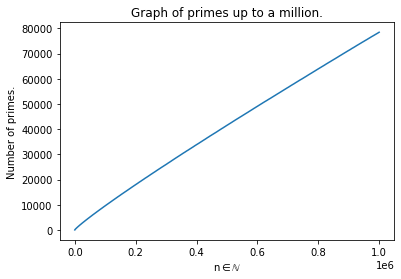

In [157]:
xval = np.arange(0,1000000)
yval = primesuptolist(1000000)
plt.plot(xval,yval)
plt.title('Graph of primes up to a million.')
plt.xlabel('n$\in\mathbb{N}$')
plt.ylabel('Number of primes.')

One technique is to find the graph of the logarithmic integral, but the calculation would take much too long to calculate.

In [158]:
#no longer needed - too long to calculate.
def Log_int_array(h):   #The li function from mpmath can't take an array as an input. We use this funtion to create array with the values given by the logarithmic integral function. 
      Values = np.zeros(h)
      for i in range(2,h):
       val = mp.li(i)
       Values[i] = val
      return Values



In [159]:
#no longer needed - too long to calculate.
Values_for_upper_bound = Log_int_array(1000000)
inputs = np.array(range(1000000))

In [ ]:
%timeit Log_int_array(1000000)

Another technique is to use the logarithmic sum $\sum_{n=2}^{x}\frac{1}{log(n)}$, which turns out to be a much faster implementation.

In [143]:
#much faster to calculate
Larray = np.log(np.arange(2, 10**6+1))
ILarray = 1/Larray
y = np.cumsum(ILarray) #Logarithmic sum

In [144]:
#makes size of x == size of y.
x = np.array(range(1000000-1))

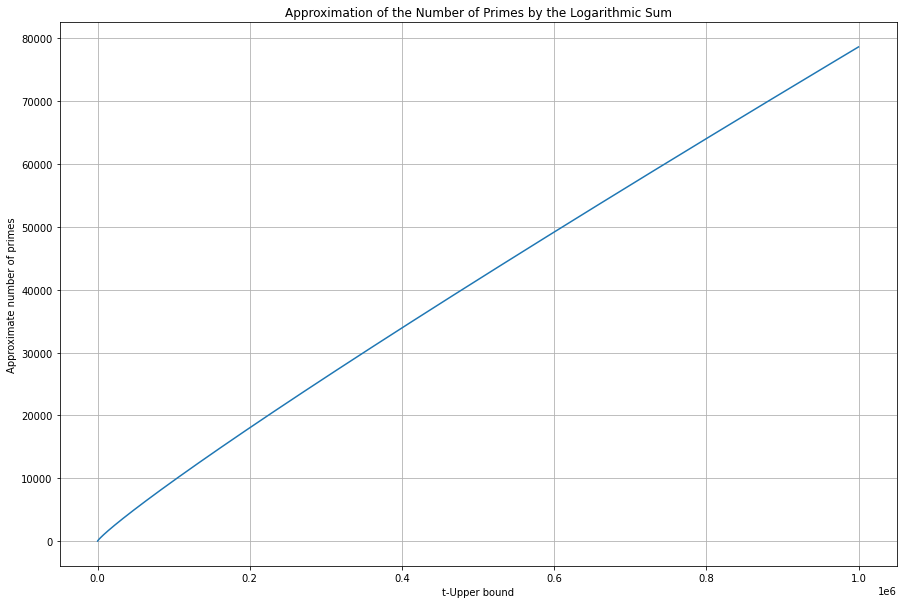

In [150]:
plt.figure(figsize=(15,10))
plt.plot(x, y) 
plt.title('Approximation of the Number of Primes by the Logarithmic Sum')
plt.xlabel('t-Upper bound')
plt.ylabel('Approximate number of primes')
plt.grid(True)
plt.show()

This graph looks very close to the real number of primes up to 1 million! 

So much so, that to the naked eye you it's not obvious there is any difference.

Here is the graph of both the number of primes and approximation:

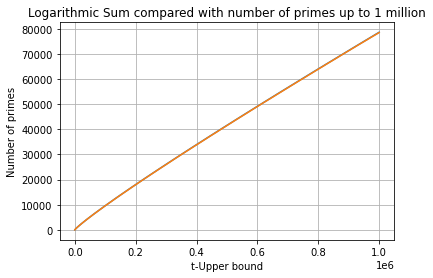

In [131]:
plt.plot(x, y)
plt.plot(xval,yval)
plt.title('Logarithmic Sum compared with number of primes up to 1 million')
plt.xlabel('t-Upper bound')
plt.ylabel('Number of primes')
plt.grid(True)
plt.show()

At this scope the graphs perfectly overlay eachother, so we will calculate the error between the plots.

In [132]:
errorvals = Values_for_upper_bound - yval

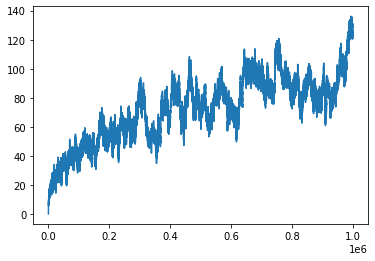

In [133]:
plt.plot(xval,errorvals)

as we see the logarithmic integral grows just slightly faster than the number of primes.